## Normalized Power Iteration and Normalized Inverse Power Iteration

## Relationship between the speed of convergence and the ratio of the eigenvalues

<br>
<br>
- $As$ is an array of $n$ 2×2 matrices (default $n = 20$). Use both normalized power iteration and normalized inverse power iteration to figure out the eigenvalues and eigenvectors of each matrix in $As$, and then we will look at the factor which influences the convergence rate of power iteration.

In [29]:
#set up
import numpy as np
n = 20
As = np.zeros((n,2,2))
for i in range(n):
    randA = np.random.randint(10,size=(2,2))
    As[i] = randA

<br>
<br>
For each 2×2 matrix (for simplicity, call it $A$) :
- Implement Normalized Power Iteration.
    
   run it on $A$. Use the following vector as your initial guess $x_0$:
   $(\frac{1}{/\sqrt{2}},\frac{1}{/\sqrt{2}})$
   
   Let $x_k$ be the vector obtained in the $k$th round of normalized power iteration. Stop the iteration if $x$ has stopped changing: 
$∥x_{k+1} − x∥_2 < 10^{12}$
Use the 2-norm to normalize.

Figure out the significant eigenvalue and its corresponding eigenvector of matrix $A$ using the final $x$ and $A$. Save them separately as an entry in $eigenval1$ and $eigenvec1$. In addition, record the number of rounds of power iteration as an entry in $cnt$.

In [30]:
import numpy.linalg as nla
#set up
eigenval1 = np.zeros(n)
eigenvec1 = np.zeros((n,2))
cnt = np.zeros(n)

In [31]:
#Part 1
for i in range(0,n):
    A = As[i]
    x0 = np.array([1/np.sqrt(2),1/np.sqrt(2)])
    x = x0/nla.norm(x0)
    norm = 0
    count = 0
    diff = 1
    while diff>1e-12 and count<1000:
        xnew = A @ x
        norm = nla.norm(xnew)
        xnew = xnew/norm
        diff = nla.norm(xnew - x)
        #print(diff)
        x = xnew
        count += 1
    eigenval1[i] = norm
    eigenvec1[i][0] = x[0]
    eigenvec1[i][1] = x[1]
    cnt[i] = count
print ('greatest eigenvalues for matrices in As:')
print (eigenval1)
print ('number of rounds for normalized power iteration to stop of each matrix given error less than 1e-12:')
print (cnt)

greatest eigenvalues for matrices in As:
[ 8.56776436  6.          7.90832691  8.31662479 10.51387819 13.14142843
  5.37228132  8.         11.40312424 11.88152731 10.77200187  6.87298335
 10.58257569  8.         14.86545993  9.37228132 10.56155281 11.65891053
  7.         13.        ]
number of rounds for normalized power iteration to stop of each matrix given error less than 1e-12:
[24. 17. 27. 17. 75. 12. 11. 20. 14. 31. 18. 14. 14. 21.  7. 27. 52. 19.
 22.  1.]


<br>
<br>
- Implement (2-Norm Normalized) Inverse Power Iteration

  run it on $A$ and use the same initial guess and stopping condition. For efficiency use LU-factorisation instead of inv()

  Find the smallest eigenvalue with respect to absolute value and its corresponding eigenvector. Save them separately as an entry in $eigenval2$ and $eigenvec2$

In [32]:
#set up
import scipy.linalg as sla
eigenval2 = np.zeros(n)
eigenvec2 = np.zeros((n,2))

In [33]:
#part2
for i in range(0,n):
    #print('start for matrix %i' %i)
    A = As[i]
    x0 = np.array([1/np.sqrt(2),1/np.sqrt(2)])
    x = x0/nla.norm(x0)
    P,L,U = sla.lu(A)
    norm = 0
    count = 0
    diff = 1
    
    while diff>1e-12 and count<1000:
        y = sla.solve_triangular(L, np.dot(P.T, x), lower=True)
        xnew = sla.solve_triangular(U, y)
        norm = nla.norm(xnew)
        xnew = xnew/norm
        diff = nla.norm(xnew - x)
        #print(diff)
        x = xnew
        count += 1
    eigenval2[i] = 1/norm
    eigenvec2[i][0] = x[0]
    eigenvec2[i][1] = x[1]
print ('smallest eigenvalues for matrices in As:')
print (eigenval2)

smallest eigenvalues for matrices in As:
[ 2.56776436  1.          2.90832691  1.68337521  7.51387819  1.14142843
  0.37228132  2.          1.40312424  4.88152731  2.22799813  0.87298335
  1.41742431  2.          0.13454007  3.62771868  6.43844719  2.65891053
  2.         13.        ]


<br>
<br>
- Relationship between the speed of convergence and the ratio of the eigenvalues
  
  Plot the graph of $\frac{|\lambda_2|}{|\lambda_1|}$ Vs $cnt$   ($\lambda_1$ is the most significant eigenvalue of the matrix, and the $\lambda_2$ is the smaller one).

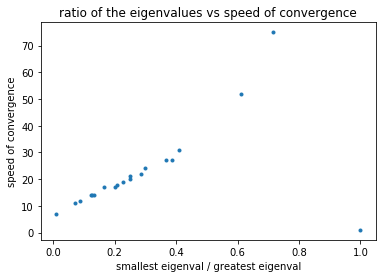

In [36]:
#Part3 Plot
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(np.abs(eigenval2)/np.abs(eigenval1),cnt,'.')
plt.xlabel('smallest eigenval / greatest eigenval')
plt.ylabel('speed of convergence')
plt.title('ratio of the eigenvalues vs speed of convergence')
plt.show()